# Assignment #1 - Linear Regression



<font color="blue"> Rohan Bhosale </font>

# Introduction

This assignment helps us for a better understanding of Linear Regression algorithms like Least Square(LS) and Least Mean Square(LMS). We here implement LS and LMS using libraries Numpy and matplotlib only.Implementing these algorithms and visualizing them will give us a fair idea about how these algorithms work, and how good are they with the predictions. Also we understand the difference between the working of LS and LMS. Here in LMS we implement LMS_step too which implements the training for one value of the dataset. We will be implementing 3 codes one for superclass 2nd for LS and 3rd for LMS and LMS_step. superclass has multiple abstract methods which will be referenced ahead, LS and LMS class will consider the actual code for these algorithms where we will calculate weights and train the model. 

# Data

I am using the data of "Amsterdam Airbnb" it consists of four different data sets, that is the data is already partitioned, first dataset consists of all the information about the Airbnb rooms and the second dataset consists of only one coloumn which is "Price",this coloumn is our target value,other two data sets are similar to the above two sets ,this is the reason I wont be partitioning the dataset, so we will be using first two datasets for Training purpose and remaining two for testing purpose. The first datatset has 16 coloumns which are as follows:<br>
<br>1.accommodates<br>
2.bathrooms<br>
3.bedrooms<br>
4.calculated_host_listings_count<br> 
5.guests_included<br>
6.host_listings_count<br>
7.latitude<br>
8.longitude<br>
9.minimum_nights<br>
10.number_of_reviews<br>
11.d_centre<br>
12.instant_bookable_f<br>
13.instant_bookable_t<br>
14.room_type_Entire home/apt<br>
15.room_type_Private room<br>
16.room_type_Shared room<br>
17.Price<br>

The first 3 coloumns 'Accomodations', 'Bathrooms', 'Bedrooms' give us the idea of the room i.e these 3 coloumns tell us about the number of guests the room can accomodate, number of bedrooms and bathrooms it has, and also they direcly affect on the price of the room. The coloumns 'Longitude' and 'latitude' tell us about the location of the room, next entry 'minimum_nights' is the minimum number of nights a guest books th room for. The last 3 entries 'room_type_Entire home/apt,  'room_type_Privateroom', 'room_type_Shared room' tell us about the type of the room. I found this data on kaggle.com.

### i.Reading Data:

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [131]:
Traindata=pd.read_csv('train.csv')

In [132]:
Traindata

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Home_or_apt,room_type_Privateroom,room_type_Sharedroom
0,4,2.0,2,1,1,1,52.358466,4.933843,2,8,3.279483,1,0,1,0,0
1,4,1.0,2,1,2,1,52.363589,4.983353,3,0,5.951843,1,0,1,0,0
2,2,1.0,1,1,1,1,52.375209,4.861647,3,8,2.601055,1,0,1,0,0
3,2,1.0,1,1,1,1,52.387382,4.890457,2,41,1.095138,1,0,0,1,0
4,2,1.0,1,1,1,1,52.384062,4.889877,3,0,0.844491,1,0,1,0,0
5,3,1.5,1,1,2,1,52.355894,4.909253,2,9,2.673105,1,0,1,0,0
6,4,2.0,2,1,2,1,52.357371,4.858546,1,0,3.684305,0,1,1,0,0
7,2,1.0,1,1,1,1,52.379513,4.854446,2,20,3.051716,1,0,1,0,0
8,5,1.5,3,1,1,1,52.359210,4.862368,2,36,3.354567,1,0,1,0,0
9,2,1.0,1,1,1,1,52.406315,4.922418,1,18,3.393541,1,0,0,1,0


In [133]:
TrainValue=pd.read_csv('y_train.csv')

In [134]:
TrainValue

,Price
0,160
1,120
2,99
3,100
4,175
5,119
6,200
7,99
8,225
9,63


In [135]:
Testdata=pd.read_csv('test.csv')

In [136]:
Testdata


,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Home_or_apt,room_type_Privateroom,room_type_Sharedroom
0,3,1.0,1,1,1,1,52.339005,4.944442,5,7,5.410324,1,0,1,0,0
1,2,1.0,1,1,1,1,52.374981,4.890104,3,9,0.786783,1,0,1,0,0
2,5,2.0,5,11,2,15,52.401826,4.914041,6,4,2.703668,1,0,1,0,0
3,4,1.0,2,1,1,1,52.350448,4.798421,2,0,7.561760,1,0,1,0,0
4,2,1.0,1,1,1,1,52.361044,4.943895,5,3,3.628639,1,0,1,0,0
5,2,1.0,2,2,1,3,52.362968,4.849790,3,1,3.820029,1,0,1,0,0
6,2,1.5,1,1,1,1,52.369856,4.855032,2,7,3.185678,1,0,1,0,0
7,2,1.0,0,1,1,1,52.339715,4.926240,2,15,4.748916,1,0,1,0,0
8,4,1.0,2,1,1,2,52.380800,4.890275,4,37,0.646394,1,0,1,0,0
9,4,1.0,3,1,1,1,52.356183,4.784301,3,1,8.219499,1,0,1,0,0


In [137]:
TestValue=pd.read_csv('y_test.csv')

In [138]:
TestValue

,Price
0,59
1,148
2,134
3,195
4,80
5,120
6,99
7,60
8,280
9,275


Here I have importes 4 data sets namely 'Traindata', 'TrainValue','Testdata', 'TestValue'. These are already partioned datasets where I will be using  'Traindata', 'TrainValue' to train the dataset and 'Testdata', 'TestValue' to test the trained values

#### Irrelevent Data:

1.calculated_host_listings_count<br>	2.guests_included<br>	3.host_listings_count<br> 4.number_of_reviews<br> 5.instant_bookable_f<br>	6.instant_bookable_t<br><br> Above data is irrelevent because it does not directly affect on the price of the room.For example 'number of reviews' never helps in increasing the price of a room, similarly is it instantly bookable or not also does not directly affect on the price.	

### ii.Preprocessing  of Data: 

Data Preprocessing is a technique to convert the raw data into understandable format. Generally, it is used to resolve issues like 'Data inconsistancy', 'errors in data'. Our data is complete and does not have any inconsistancies so we do not need to perform any data preprocessing on our data.

### iii.Visualization of Data:

Data visualization is the representation of data and information with the help of graphs, charts, and maps. So let us start to visualize out data and find different relations between them. As our target value is price we will try to find out how each coloumn affects the target value.

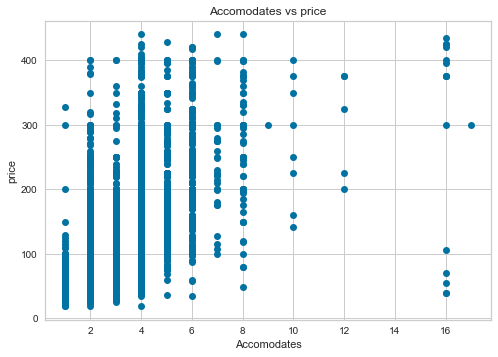

In [139]:
plt.plot(Traindata.accommodates,TrainValue.Price,'o')
plt.title("Accomodates vs price")
plt.xlabel("Accomodates")
plt.ylabel("price")
plt.show()

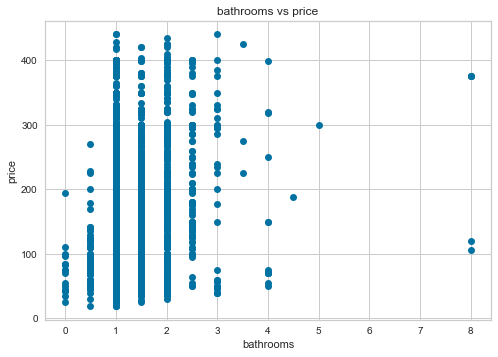

In [140]:
plt.plot(Traindata.bathrooms,TrainValue.Price,'o')
plt.title("bathrooms vs price")
plt.xlabel("bathrooms")
plt.ylabel("price")
plt.show()

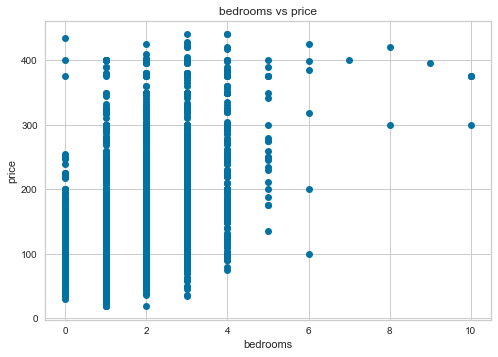

In [141]:
plt.plot(Traindata.bedrooms,TrainValue.Price,'o')
plt.title("bedrooms vs price")
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()

The above three graphs even though do not highly affect on price but give us a fair knowladge of what kind of rooms a larger chunk of Airbnb listings in amsterdam have. we can infer that the larger chunk of Airbnb listings accommodate 6 people, have 2 bathrooms and have 4 bedrooms. We can see the rates of these rooms rangong from 0 to more than 400 this is because of the other factors in the data set. Above three graphs can also be presented in the following way:

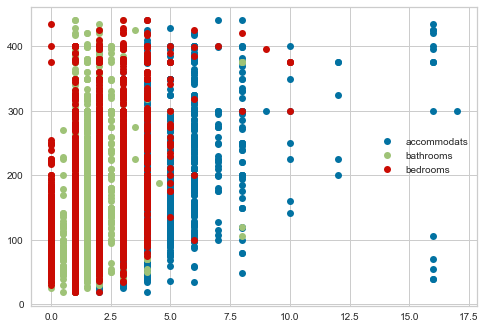

In [142]:
plt.plot(Traindata.accommodates,TrainValue.Price,'o')
plt.plot(Traindata.bathrooms,TrainValue.Price,'o')
plt.plot(Traindata.bedrooms,TrainValue.Price,'o')
plt.legend(['accommodats','bathrooms','bedrooms'])
plt.show()

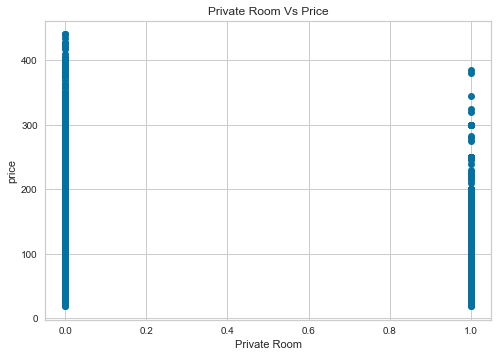

In [143]:
plt.plot(Traindata.room_type_Privateroom,TrainValue.Price,'o')
plt.title("Private Room Vs Price")
plt.xlabel("Private Room")
plt.ylabel("price")
plt.show()

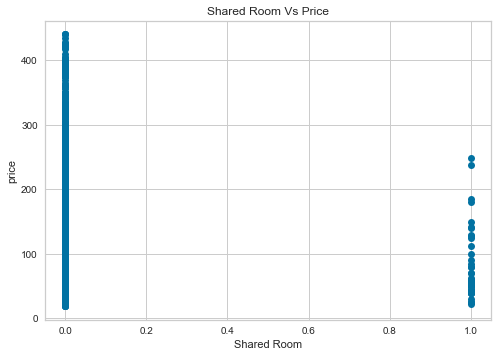

In [144]:
plt.plot(Traindata.room_type_Sharedroom,TrainValue.Price,'o')
plt.title("Shared Room Vs Price")
plt.xlabel("Shared Room")
plt.ylabel("price")
plt.show()

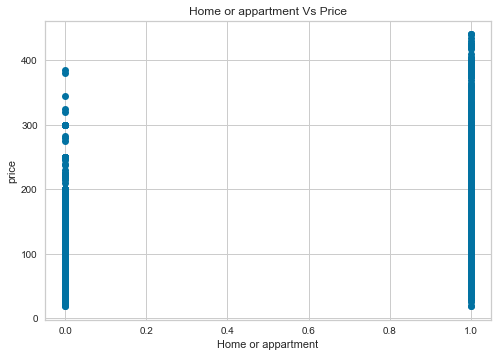

In [145]:
plt.plot(Traindata.room_type_Home_or_apt,TrainValue.Price,'o')
plt.title("Home or appartment Vs Price")
plt.xlabel("Home or appartment")
plt.ylabel("price")
plt.show()

In above 3 Graphs 0 on x axis means that it is not that particular room for example in the graph 'Home or appartment vs Price' if the value of 'Home of appartment' on X-axis is 0 that means those are not Home or appartment type of rooms, and value 1 on X-axis indicates that those are 'Home or appartment' type of rooms similarly for other graphs too. Froms the above graphs we can infer that 'Shared rooms' have relatively lower prices than other two type of rooms, 'Private rooms' are moderately prices whereas 'Home or appartments' are highly priced. Also if we absorve from the data we can understand that Airbnb in Amsterdam have more listings of 'Home or appartments' than other two type of rooms. So we can say that type of rooms does affect the pricing of the room.<br> Now let us see the main coloumns that affect the pricing of a Airbnb room which is location. In this data set we are given location with the help of 'Longitude' and 'Latitude'.

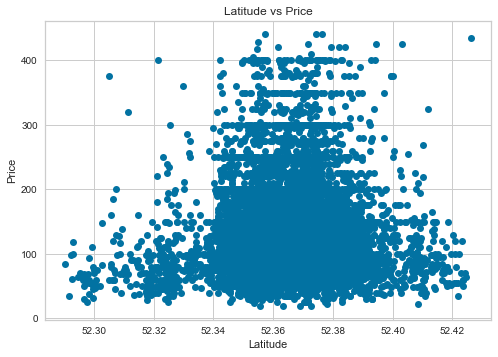

In [146]:
plt.plot(Traindata.latitude,TrainValue.Price,'o')
plt.title("Latitude vs Price")
plt.xlabel("Latitude")
plt.ylabel("Price")
plt.show()

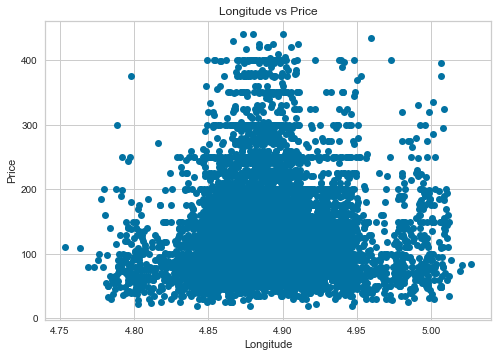

In [147]:
plt.plot(Traindata.longitude,TrainValue.Price,'o')
plt.title("Longitude vs Price")
plt.xlabel("Longitude")
plt.ylabel("Price")
plt.show()

The above two graphs show a large chunk of listings in the middle of the graphs that id between 52.34-52.40 in 'Latitude vs Price' and between 4.58-4.95 in 'Latitude vs Price', this shows that a location of a room does matters. We can also see the a large value of highly priced rooms (300 and more) lie in this particular area of graph which again indicates that the location of a room is very important according price. So we can say that even though other factors do matter while deciding the price but location does largely affect the price of a room.<br> There is one more factor that is D_centre that is distance from the centre, let us see how it works. 

<function matplotlib.pyplot.show(*args, **kw)>

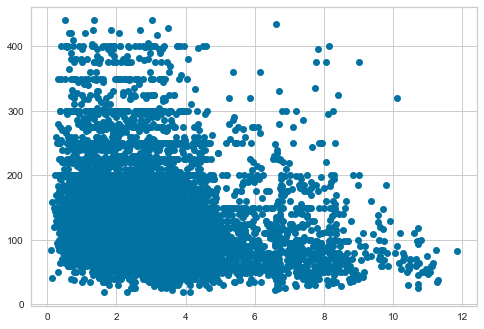

In [148]:
plt.plot(Traindata.d_centre,TrainValue.Price,'o')
plt.show

Here we can observe that less the value of D_centre more is the pricing of rooms, also the rooms with low value of D_centre are more favorable because we can see that a larger chunk of Airbnb listings lie between 0-4 which can said to be low values for D_centre.

### iv.Priliminary Observations:

From the above observations we can see that coloumns like 'accomodates', 'bathrooms', 'bedrooms' do not  directly affect on price or we can say have minimal affect on price, but they do give us a fair idea about the room and its aminities, the coloumns 'room_type_Home_or_apt', 'room_type_Privateroom', 'room_type_Sharedroom' have some affect on the price but again these coloumns give us a fair idea about the type of listings or rooms the city has and the graph plots corrosponding these coloumns also gives an idea about the pricing of each tpe of rooms. Moving on to the main coloumns that affect the pricing of the rooms 'latitude', 'longitude' and 'D_centre', we can say that these coloumns directly affect on the pricing of the Airbnb rooms, and this can be confirmed from the graph plots that corrospond to these coloumns. Now we can conclude saying that the most affect on our target value i.e Price is done by the longitude, latitude and D_centre which can be said to be the location of the room, Next things that affected the pricing more was the type if rooms i.e Shared, private, Home or appartment, at the end we can say that the least amount of affetc on pricing was doen by coloumns accommodations, bathrooms, bedroms. 

# Method
 

### Linear Model

Linear model can be defined as a Euclidean dot product between two vectors: 

$$
\begin{align}
  f(x; w) &= w^T x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

where $w$ is a weight vector and $x$ is an input vector. 
When it is a one dimensional vector, it represents a straight line, so it is called *linear*. 
<br>
We will be seeing 2 models or algorithms those are Least square(LS) and Least Mean Square(LMS).

#### 1. Least Square (LS):
least squares regression is a way to find the line of best fit for a set of data. It does this by creating a model that minimizes the sum of the squared vertical distances (residuals).  least squares use all the available data for training or finding the best fit.
These distances are also known as weights and these weights can be calculated with the help of formula:
$$ w= (X^T * X)^-1 *X^T*t $$

#### 2. Least Mean Square(LMS):
Least Mean square is a sequential or online learningmethod here we learn and train the model step by step.
When data is sufficiently large, we can consider sequential or online learning. During the online learning process, we introduce a data point one by one, and update the parameters. Using the updated parameters, it makes a new estimation and repeat these steps.

For this, we start with an initial guess  𝐰  and changes it as it reads more data until it converges.
The weights in this method can be calculated by the formula:
$$ W^(k+1)= W^k-α((W^k)^t * X(k)-t(k))*X(k) $$ 

### Super Classs Definition

In [149]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [150]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        
        self.w= np.linalg.inv(X.T @ X) @ X.T @ T 
       
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        y = X @ self.w 
        return y  

### Least Mean Squares

In [151]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """

    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        
    # batch training by using train_step function
    def train(self, X, T):  
        
        self.w=None
        for x, t in zip(X, T):
            self.train_step(x,t)

            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
       
        x = np.insert(x,0,1).reshape(-1,1)
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
        
        self.w =self.w - self.alpha *( self.w.T @ x-t )* x



    def use(self, X):
        
        x = self.add_ones(X).T
        y = self.w.T @ x
    
        return y.T
        



### Usage Examples

In [152]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

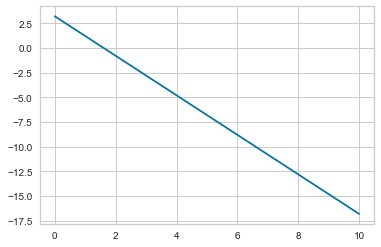

In [153]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2


ls = LinearRegress()

ls.train(X, T)
plt.plot(ls.use(X))

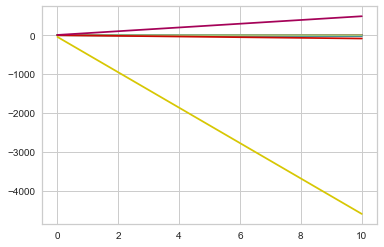

In [155]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

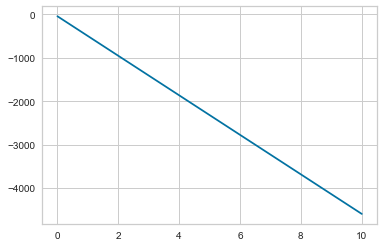

In [156]:
lms.train(X, T)
plt.plot(lms.use(X))

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [157]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Experiments

Apply LS and LMS methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


## Code Explainations


### Super Class:

CODE:<br>
import numpy as np 
from abc import ABC, abstractmethod

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 
        
        
In super class we have written multiple abstract classes such as __init__ function which will help us to initialize self which will be used in further classes LS and LMS to initialize weights and alpha. We here have defined an abstract class Linear Model which consistis of these abstract methods which we will be usinf in further classes ti implement them.

### i. LS


I implement the least squares model and applied to the simulated data X and T. I usef np.linalg.inv to het my parameter w. After getting the parameter w.

CODE:<br><br>

class LinearRegress(LinearModel): 
  
        #LinearRegress class 
        
        #attributes
        #===========
        #w    nd.array  (column vector/matrix)
        #    weights
  
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        
        self.w= np.linalg.inv(X.T @ X) @ X.T @ T 
       
        print(self.w)
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        y = X @ self.w 
        return y  



so in this code first we give a call to __init__ method which helps us initialise self and all the attributes relateed to LS function like 'w' which is used to store weights. In the next fuction 'train' we train the actual model, here we pass the data set that the model is to be trained on. First step here is we add a bias to the dataset and then calculate the weights with the formula <br> $$ w= (X^T * X)^-1 *X^T*t $$<br> in code we use 'np.linalg.inv()' function to get the inverse we will also be printing the values of our weights just tu check the shape if the weight matrix. In the next function that is the 'use' function we apply this trained model on the data set that is to be tested in our case it is 'Testdata'. So here we again add bais to the dataset and run the dataset against our weights to get the predicted values. Let us now visualize the results.

#### Plot for predicted Values

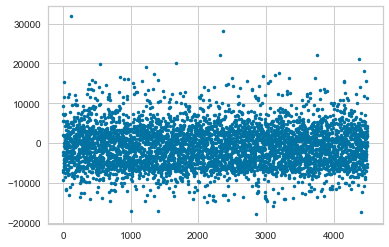

In [158]:

ls = LinearRegress()
ls.train(Traindata, TrainValue)
a=ls.use(Testdata)
plt.plot(a,'.')


#### Plot for actual Values

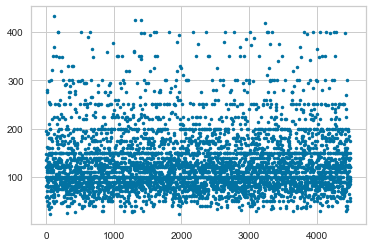

In [159]:
plt.plot(TestValue,'.')

##### let us see how well did it perform

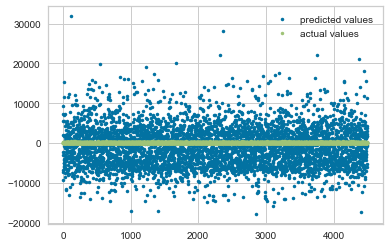

In [160]:
ls = LinearRegress()
ls.train(Traindata, TrainValue)
plt.plot(ls.use(Testdata),'.')
plt.plot(TestValue,'.')
plt.legend(['predicted values','actual values'])

Here we can see that although the model is predicting values correctly we can see alot of outliers which is not good. And also the actual values are not 0 they lie between 50-500 but as the scale on Y-axis is soo large actual values tend to be near 0.

### ii. LMS

Previously we observed that the least squares use all the available data for training or finding the best fit. This can be often computationally costly, especially with large data sets. When data is sufficiently large, we can consider sequential or online learning. During the online learning process, we introduce a data point one by one, and update the parameters. Using the updated parameters, it makes a new estimation and repeat these steps.

CODE:<br><br>
import collections # for checking iterable instance

class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """

    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        
    # batch training by using train_step function
    def train(self, X, T):  
        
        self.w=None
        for x, t in zip(X, T):
            self.train_step(x,t)

            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
       
        x = np.insert(x,0,1).reshape(-1,1)
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
        
        self.w =self.w - self.alpha *( self.w.T @ x-t )* x



    def use(self, X):
        
        x = self.add_ones(X).T
        y = self.w.T @ x
    
        return y.T
        



In this code we start with a call to __init__ function in the first block of the code, this function helps us initialize w and alpha which we further need. In next function that is the train function we do batch training,first of all we initialize w to None so as to confirm that it does not use any old or random value and then in the for loop where x,t which will be our values for train step which are in our Training dataset,we give call to train_step function we do this so as to iterate through whole dataset as train_step function only trains for 1 value in the dataset. In train_step function we check if value of w is none if yes we convert it to a array of zeros of shape of the first value of datasets shape that is the no. of rows we train at that point, 1. Then we calculate the weights according to the formula<br>
$$ W^(k+1)= W^k-α((W^k)^t * X(k)-t(k))*X(k) $$  In the use function we first add a bias in our data and then run our trained model on the testing dataset to get our predicted values. Let us visualize the results.

#### Plot for predicted values

In [161]:
Xtrain=pd.read_csv('train.csv').values
Ytrain=pd.read_csv('y_train.csv').values
Xtest=pd.read_csv('test.csv').values
Ytest=pd.read_csv('y_test.csv').values



#### Plot for predicted values

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in matmul
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in matmul
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in matmul


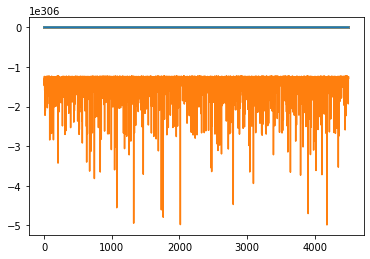

In [98]:
lms = LMS(0.1)
for x, t in zip(Xtrain, Ytrain):
    lms.train_step(x, t)
    plt.plot(lms.use(Xtest))

#### Plot for Actual values

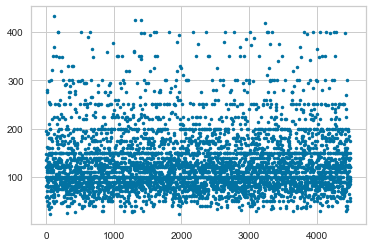

In [162]:
plt.plot(Ytest,'.')

In above plotted 2 graphs first one is the graph which plotted using our trained function and second one is the graph of actual values we can see that the results of trained model are not at all good. As we can derictly see that the predicted values should have been between 50 to 100 as actual values but are predicted to be less than 0. 

### Analysis and comparison of algorithms

we can see that in LS algorithms we can predict the values but we also get a lot of outliers this is because we have alot of irrelevent data in our dataset, but in LMS we are not ablr to predict values at all this might be because oh the minute erros that the algorithm faces while it is run on the actual dataset. from the below graphs for LS and LMS we can surely identify that.

##### plot for LS

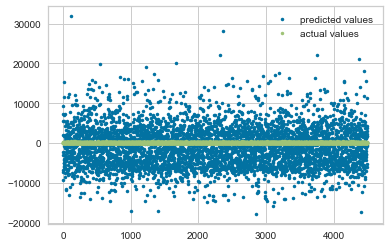

In [163]:
ls = LinearRegress()
ls.train(Traindata, TrainValue)
plt.plot(ls.use(Testdata),'.')
plt.plot(TestValue,'.')
plt.legend(['predicted values','actual values'])

##### RMSE value for LS

In [164]:
np.sqrt(np.mean((a - Ytest)**2)/14996)

Price    42.87097
dtype: float64

##### Plot for LMS and actual values

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in matmul
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in matmul
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in matmul


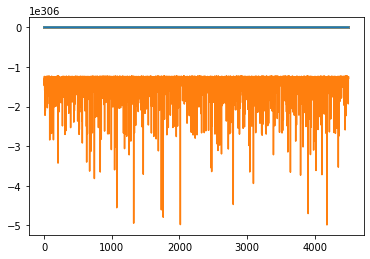

In [119]:
Xtrain=pd.read_csv('train.csv').values
Ytrain=pd.read_csv('y_train.csv').values
Xtest=pd.read_csv('test.csv').values
Ytest=pd.read_csv('y_test.csv').values


lms = LMS(0.1)
for x, t in zip(Xtrain, Ytrain):
    lms.train_step(x, t)
    plt.plot(lms.use(Xtest))

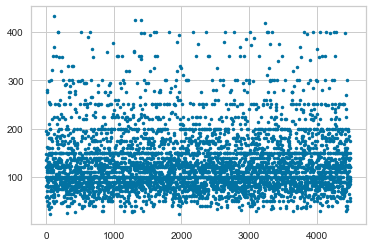

In [165]:
plt.plot(Ytest,'.')

##### RMSE value for LMS

In [166]:
np.sqrt(np.mean((Xtest - Ytest)**2)//14996)


1.0

### Extra Credit 

- what is the most and least significant features for your data.<br>
<br>The least significant values of my data set are:-
    <br>1.calculated_host_listings_count<br>	2.guests_included<br>	3.host_listings_count<br> 4.number_of_reviews<br> 5.instant_bookable_f<br>	6.instant_bookable_t<br> 7.d_centre<br>8.longitude<br>9.longitude<br><br> The most significant fetures are:<br>1.accommodates<br>2.bedrooms<br>3.bathrooms<br>4. minimum_nights<br>5.room_type_Home_or_apt<br>6.room_type_Privateroom<br>7.room_type_Sharedroom<br>

- what are the consequences if you remove those features from the model? (Show your work!)

In [168]:
Traindata_LeastSignificant=Traindata.drop(['longitude','latitude','d_centre','calculated_host_listings_count','guests_included','host_listings_count','number_of_reviews','instant_bookable_f','instant_bookable_t'],axis=1)

In [169]:
Testdata_LeastSignificant=Testdata.drop(['longitude','latitude','d_centre','calculated_host_listings_count','guests_included','host_listings_count','number_of_reviews','instant_bookable_f','instant_bookable_t'],axis=1)

In [170]:
Traindata_LeastSignificant

,accommodates,bathrooms,bedrooms,minimum_nights,room_type_Home_or_apt,room_type_Privateroom,room_type_Sharedroom
0,4,2.0,2,2,1,0,0
1,4,1.0,2,3,1,0,0
2,2,1.0,1,3,1,0,0
3,2,1.0,1,2,0,1,0
4,2,1.0,1,3,1,0,0
5,3,1.5,1,2,1,0,0
6,4,2.0,2,1,1,0,0
7,2,1.0,1,2,1,0,0
8,5,1.5,3,2,1,0,0
9,2,1.0,1,1,0,1,0


In [171]:
Testdata_LeastSignificant

,accommodates,bathrooms,bedrooms,minimum_nights,room_type_Home_or_apt,room_type_Privateroom,room_type_Sharedroom
0,3,1.0,1,5,1,0,0
1,2,1.0,1,3,1,0,0
2,5,2.0,5,6,1,0,0
3,4,1.0,2,2,1,0,0
4,2,1.0,1,5,1,0,0
5,2,1.0,2,3,1,0,0
6,2,1.5,1,2,1,0,0
7,2,1.0,0,2,1,0,0
8,4,1.0,2,4,1,0,0
9,4,1.0,3,3,1,0,0


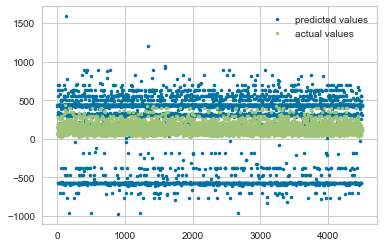

In [172]:
ls = LinearRegress()
ls.train(Traindata_LeastSignificant, TrainValue)
plt.plot(ls.use(Testdata_LeastSignificant),'.')
plt.plot(TestValue,'.')
plt.legend(['predicted values','actual values'])

Above we can see a significant change the number of outliers and wrong predictions reduce to one fifth of the precious. This can be seen on y axis before dropping the values Y axis ranged from -10000 to 10000 and now the maximum values lie in -2000 to 2000.

In [173]:
Traindata_MostSignificant=Traindata.drop(['accommodates','bedrooms','bathrooms','minimum_nights','room_type_Home_or_apt','room_type_Privateroom','room_type_Sharedroom'],axis=1)

In [174]:
Testdata_MostSignificant=Testdata.drop(['accommodates','bedrooms','bathrooms','minimum_nights','room_type_Home_or_apt','room_type_Privateroom','room_type_Sharedroom'],axis=1)

In [175]:
Traindata_MostSignificant

,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t
0,1,1,1,52.358466,4.933843,8,3.279483,1,0
1,1,2,1,52.363589,4.983353,0,5.951843,1,0
2,1,1,1,52.375209,4.861647,8,2.601055,1,0
3,1,1,1,52.387382,4.890457,41,1.095138,1,0
4,1,1,1,52.384062,4.889877,0,0.844491,1,0
5,1,2,1,52.355894,4.909253,9,2.673105,1,0
6,1,2,1,52.357371,4.858546,0,3.684305,0,1
7,1,1,1,52.379513,4.854446,20,3.051716,1,0
8,1,1,1,52.359210,4.862368,36,3.354567,1,0
9,1,1,1,52.406315,4.922418,18,3.393541,1,0


In [176]:
Testdata_MostSignificant

,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t
0,1,1,1,52.339005,4.944442,7,5.410324,1,0
1,1,1,1,52.374981,4.890104,9,0.786783,1,0
2,11,2,15,52.401826,4.914041,4,2.703668,1,0
3,1,1,1,52.350448,4.798421,0,7.561760,1,0
4,1,1,1,52.361044,4.943895,3,3.628639,1,0
5,2,1,3,52.362968,4.849790,1,3.820029,1,0
6,1,1,1,52.369856,4.855032,7,3.185678,1,0
7,1,1,1,52.339715,4.926240,15,4.748916,1,0
8,1,1,2,52.380800,4.890275,37,0.646394,1,0
9,1,1,1,52.356183,4.784301,1,8.219499,1,0


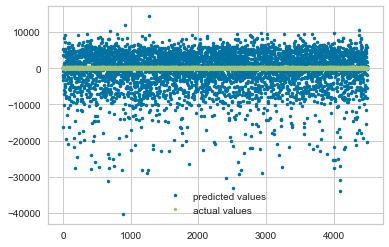

In [177]:
ls = LinearRegress()
ls.train(Traindata_MostSignificant, TrainValue)
plt.plot(ls.use(Testdata_MostSignificant),'.')
plt.plot(TestValue,'.')
plt.legend(['predicted values','actual values'])

As we can see aboveafter the removal of the most significant values we land up in the same place that we were in, that is number of outliers increase and the prediction values become more sparse over the y-axis. 

- produce residual plots and observe the patterns for the goodness of fit  

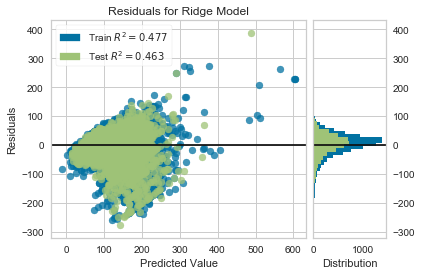

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(Xtrain, Ytrain)  # Fit the training data to the visualizer
visualizer.score(Xtest, Ytest)  # Evaluate the model on the test data
visualizer.poof()

# Conclusions

This assignment is completely based on Linear regression algorithms, inplementing these algorithms gives us a fair understanding of these algorithms. The biggest challange in this assignment we understanding of the shape of matrices and playing with them so as to get the final result that we need. LS was abit easy to implement but the real challange was implementing LMS correctly with less error values. Also this assignment helps us to understand the matrix algebra properly. 

# References

[1] Goodfellow, Ian, et al. Deep Learning. MIT Press, 2016.<br>
[2] AdityaDeshpande. “Amsterdam - AirBnb.” Kaggle, 5 Apr. 2019, https://www.kaggle.com/adityadeshpande23/amsterdam-airbnb/metadata.<br>
[3] Prof.Minwoo J. Lee ,Class Notebooks (ForestFire, Class Notes)

[4] “Residuals Plot¶.” Residuals Plot - Yellowbrick v1.0.post1 Documentation, https://www.scikit-yb.org/en/latest/api/regressor/residuals.html.